<a href="https://colab.research.google.com/github/klklgooa/MachineLearning/blob/main/4_1_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k-최근접, 로지스틱 회귀로 다중 분류 수행, 확률적 경사하강법 실습

In [49]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
print(pd.unique(iris['Species']))

['setosa' 'versicolor' 'virginica']


In [51]:
train_input = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy()
train_target = iris['Species'].to_numpy()

In [52]:
print(train_input[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [53]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    train_input, train_target, stratify=train_target, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


In [56]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


In [57]:
print(kn.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [58]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[1.     0.     0.    ]
 [0.     0.6667 0.3333]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [1.     0.     0.    ]]


In [59]:
distances, indexes = kn.kneighbors(test_scaled[1:2])
print(train_target[indexes])

[['versicolor' 'virginica' 'versicolor']]


두번째 샘플의 확률 ... versicolor 두개(0.6667, virginica 한개(0.3333) 확률 출력

로지스틱 회귀로 다중 분류 수행


In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
#lr.fit(train_bream_smelt, target_bream_smelt)

In [61]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9821428571428571
0.9473684210526315


In [62]:
print(lr.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [63]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


In [64]:
print(lr.classes_)

['setosa' 'versicolor' 'virginica']


In [65]:
print(lr.coef_.shape, lr.intercept_.shape)

(3, 4) (3,)


In [66]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ 14.49   7.22 -21.71]
 [ -2.88   2.82   0.06]
 [ -1.46   3.99  -2.52]
 [ -3.4    4.44  -1.04]
 [ 13.45   7.44 -20.9 ]]


In [67]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


In [68]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [69]:
from sklearn.linear_model import SGDClassifier

In [70]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) #매개변수 설정
sc.fit(train_scaled, train_target) #훈련

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8392857142857143
0.7631578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


점진적 학습을 위한 확률적 경사 하강법

(손실함수, 에포크) SGDClssifier클래스 미니배치또는 배치 경사 하강법을 지원하지 않음 loss: 손실 함수 종류 지정(log_loss로 지정) log_loss: 로지스틱 손실 함수를 뜻함 Mx_iter: 수행할 에포크 횟수 지정(10으로 지정)

In [72]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
print(pd.unique(iris['Species']))

['setosa' 'versicolor' 'virginica']


In [74]:
train_input = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy()
train_target = iris['Species'].to_numpy()
print(train_input[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [75]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    train_input, train_target, stratify=train_target, random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [79]:
sc.partial_fit(train_scaled, train_target) #점진적 학습가능하므로 1에포크씩 이어서 훈련.

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9196428571428571
0.8947368421052632


In [80]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [81]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

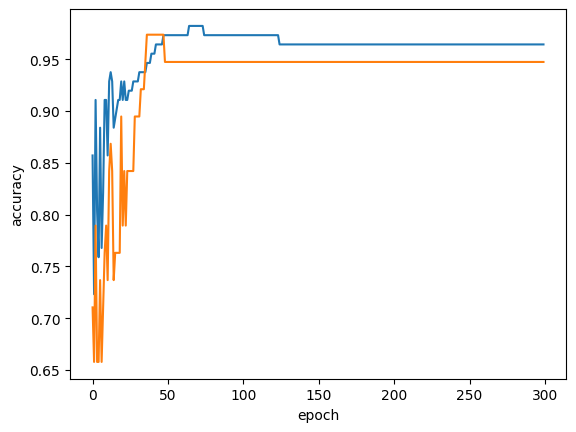

In [82]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [86]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.score(train_scaled, train_target) - sc.score(test_scaled, test_target))

0.9642857142857143
0.9473684210526315
0.016917293233082775


In [87]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.score(train_scaled, train_target) - sc.score(test_scaled, test_target))

0.9553571428571429
0.9210526315789473
0.03430451127819556
